In [8]:
import xarray as xr
import matplotlib.pyplot as plt

data_30_years = xr.open_dataset("/content/drive/MyDrive/Biporjoy_project_data/years_30_data_Bay_of_Bengal.nc")
data_30_years

<xarray.Dataset>
Dimensions:    (longitude: 77, latitude: 75, time: 408)
Coordinates:
  * longitude  (longitude) float32 80.2 80.45 80.7 80.95 ... 98.7 98.95 99.2
  * latitude   (latitude) float32 23.2 22.95 22.7 22.45 ... 5.45 5.2 4.95 4.7
  * time       (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2023-12-01
Data variables:
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-16 03:40:28 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

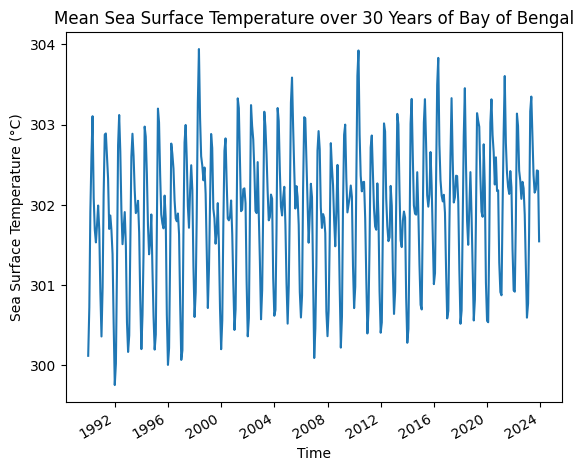

In [9]:
# Calculate the mean SST over longitude and latitude dimensions
mean_sst = data_30_years['sst'].mean(dim=('longitude', 'latitude'))

# Plot the mean SST over time
mean_sst.plot()
plt.title('Mean Sea Surface Temperature over 30 Years of Bay of Bengal')
plt.xlabel('Time')
plt.ylabel('Sea Surface Temperature (°C)')
plt.show()


In [10]:
import plotly.express as px

# Extract SST data
sst_data = data_30_years['sst']

# Reshape data for Plotly
sst_data_reshaped = sst_data.mean(dim=('latitude', 'longitude'))  # Take the mean over latitude and longitude

# Create Plotly figure
fig = px.line(x=sst_data_reshaped.coords['time'], y=sst_data_reshaped.values, title='Mean Sea Surface Temperature over 30 Years of Bay of Bengal')
fig.update_xaxes(title='Time')
fig.update_yaxes(title='Mean Sea Surface Temperature')
fig.show()


In [11]:
import plotly.express as px

# Group data by year and calculate the mean over the time dimension
sst_data_mean_yearly = data_30_years['sst'].groupby('time.year').mean(dim='time')

# Reshape data for Plotly
sst_data_mean_yearly_reshaped = sst_data_mean_yearly.mean(dim=('latitude', 'longitude'))  # Take the mean over latitude and longitude

# Create Plotly figure
fig = px.line(x=sst_data_mean_yearly_reshaped.coords['year'], y=sst_data_mean_yearly_reshaped.values, title='Mean Sea Surface Temperature per Year of Bay of Bengal')
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Mean Sea Surface Temperature')
fig.show()


In [12]:
import plotly.express as px

# Group data by year and calculate the mean over the time dimension
sst_data_mean_yearly = data_30_years['sst'].groupby('time.year').mean(dim='time')

# Convert sea surface temperature from Kelvin to Celsius
sst_data_mean_yearly_celsius = sst_data_mean_yearly - 273.15

# Reshape data for Plotly
sst_data_mean_yearly_reshaped = sst_data_mean_yearly_celsius.mean(dim=('latitude', 'longitude'))  # Take the mean over latitude and longitude

# Create Plotly figure
fig = px.line(x=sst_data_mean_yearly_reshaped.coords['year'], y=sst_data_mean_yearly_reshaped.values, title='Mean Sea Surface Temperature per Year of Bay of Bengal')
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Mean Sea Surface Temperature (°C) of Bay of Bengal', range=[26, sst_data_mean_yearly_celsius.max()])  # Set the lowest value on the y-axis to 26°C
fig.show()


In [13]:
import plotly.express as px
import numpy as np

# Group data by year and calculate the mean over the time dimension
sst_data_mean_yearly = data_30_years['sst'].groupby('time.year').mean(dim='time')

# Convert sea surface temperature from Kelvin to Celsius
sst_data_mean_yearly_celsius = sst_data_mean_yearly - 273.15

# Reshape data for Plotly
sst_data_mean_yearly_reshaped = sst_data_mean_yearly_celsius.mean(dim=('latitude', 'longitude'))  # Take the mean over latitude and longitude

# Create Plotly figure
fig = px.line(x=sst_data_mean_yearly_reshaped.coords['year'], y=sst_data_mean_yearly_reshaped.values, title='Mean Sea Surface Temperature per Year')
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Mean Sea Surface Temperature (°C)', range=[26, sst_data_mean_yearly_celsius.max()])  # Set the lowest value on the y-axis to 26°C
fig.update_traces(hovertemplate='Year: %{x}<br>SST: %{y:.2f}°C')

# Calculate trend line using linear regression
x = sst_data_mean_yearly_reshaped.coords['year'].values
y = sst_data_mean_yearly_reshaped.values
m, b = np.polyfit(x, y, 1)  # Fit a linear trend line
trend_line = m * x + b

# Add trend line to the plot
fig.add_scatter(x=x, y=trend_line, mode='lines', name='Trend Line')

fig.show()


In [14]:
import plotly.express as px
import numpy as np


# Group data by year and calculate the mean over the time dimension
sst_data_mean_yearly_BoB = data_30_years_BoB['sst'].groupby('time.year').mean(dim='time')

# Convert sea surface temperature from Kelvin to Celsius
sst_data_mean_yearly_BoB_celsius = sst_data_mean_yearly_BoB - 273.15

# Reshape data for Plotly
sst_data_mean_yearly_BoB_reshaped = sst_data_mean_yearly_BoB_celsius.mean(dim=('latitude', 'longitude'))  # Take the mean over latitude and longitude

# Create Plotly figure
fig_BoB = px.line(x=sst_data_mean_yearly_BoB_reshaped.coords['year'], y=sst_data_mean_yearly_BoB_reshaped.values, title='Mean Sea Surface Temperature per Year of Bay of Bengal')

# Update layout properties for white background, black plotted lines, and black x and y axes
fig_BoB.update_layout(
    plot_bgcolor='white',  # Set background color to white
    xaxis=dict(
        title='Year',
        titlefont=dict(color='black'),  # Set x-axis title color to black
        tickfont=dict(color='black'),   # Set x-axis tick color to black
        showgrid=False,
        gridcolor='black',              # Set x-axis grid color to black
        linecolor = "black",
        linewidth = 1
    ),
    yaxis=dict(
        title='Mean Sea Surface Temperature (°C)',
        titlefont=dict(color='black'),  # Set y-axis title color to black
        tickfont=dict(color='black'),   # Set y-axis tick color to black
        range=[26, sst_data_mean_yearly_BoB_celsius.max()],
        showgrid= False,
        gridcolor='black',               # Set y-axis grid color to black
        linecolor = "black",
        linewidth = 1
    )
)

# Update trace color to black
fig_BoB.update_traces(line=dict(color='black'))

# Calculate trend line using linear regression
x = sst_data_mean_yearly_BoB_reshaped.coords['year'].values
y = sst_data_mean_yearly_BoB_reshaped.values
m, b = np.polyfit(x, y, 1)  # Fit a linear trend line
trend_line = m * x + b

# Add trend line to the plot
fig_BoB.add_scatter(x=x, y=trend_line, mode='lines', name='Trend Line')

# Update hover template
fig_BoB.update_traces(hovertemplate='Year: %{x}<br>SST: %{y:.2f}°C')

# Show the plot
fig_BoB.show()


In [15]:
import plotly.express as px

# Group data by month and calculate the mean over the time dimension
sst_data_monthly_mean = data_30_years['sst'].groupby('time.month').mean(dim='time')

# Convert sea surface temperature from Kelvin to Celsius
sst_data_monthly_mean_celsius = sst_data_monthly_mean - 273.15

# Take the mean over latitude and longitude
sst_data_monthly_mean_celsius_reshaped = sst_data_monthly_mean_celsius.mean(dim=('latitude', 'longitude'))

# Create Plotly figure
fig = px.line(x=sst_data_monthly_mean_celsius_reshaped.coords['month'], y=sst_data_monthly_mean_celsius_reshaped.values, title='Mean Sea Surface Temperature per Month (1990-2023) of Bay of Bengal')
fig.update_xaxes(title='Month', tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig.update_yaxes(title='Mean Sea Surface Temperature (°C)')
fig.show()


In [16]:
import plotly.express as px
import calendar

# Filter data for years from 2000 to 2022
sst_data_filtered = data_30_years.sel(time=slice('2014-01-01', '2022-12-31'))

# Group data by year and month, then calculate the mean over latitude and longitude
sst_data_monthly_mean = sst_data_filtered.groupby('time.month').mean(dim=['latitude', 'longitude'])

# Convert sea surface temperature from Kelvin to Celsius
sst_data_monthly_mean_celsius = sst_data_monthly_mean - 273.15

# Extract month values from the time coordinates and get month names
months = sst_data_monthly_mean_celsius.time.dt.month.values
month_names = [calendar.month_name[month] for month in months]

Year = sst_data_monthly_mean_celsius.time.dt.year.values


# Create Plotly figure
fig = px.line(sst_data_monthly_mean_celsius, x=month_names, y='sst',
              title='Average Sea Surface Temperature by Month (2000-2022) of Bay of Bengal',
              labels={'sst': 'Avg SST (°C)', 'x': 'Month'},
              color=Year,
              custom_data=[Year])

fig.update_traces(mode='lines')
fig.update_yaxes(range=[26, 31], title='Average Sea Surface Temperature (°C)')
fig.update_layout(legend_title_text='Year')
fig.show()




# Update layout properties for white background, black plotted lines, and black x and y axes


In [17]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 49.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lines.zip



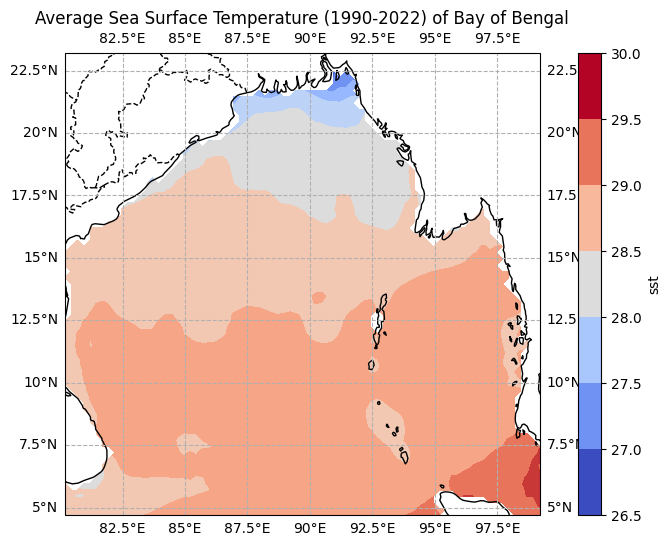

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


# Filter data for the year range 2020 to 2022
sst_data_filtered = data_30_years.sel(time=slice('1990-01-01', '2022-12-31'))

# Calculate the mean SST over the time period
sst_data_mean = sst_data_filtered['sst'].mean(dim='time') - 273.15

# Create a Cartopy projection
projection = ccrs.PlateCarree()

# Plot the map of average SST with contours
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)
ax.coastlines()
sst_contour = sst_data_mean.plot.contourf(ax=ax, transform=projection, cmap='coolwarm')
plt.title('Average Sea Surface Temperature (1990-2022) of Bay of Bengal')

# Add state boundaries
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linestyle='--')

sst_plot = plt.contourf(sst_data_mean.longitude, sst_data_mean.latitude, sst_data_mean,
                        transform=projection, cmap='coolwarm')
#plt.colorbar(sst_plot, label='Sea Surface Temperature (°C)')
#plt.title('Sea Surface Temperature for the Year 2023')

# Add latitude and longitude scales
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show()


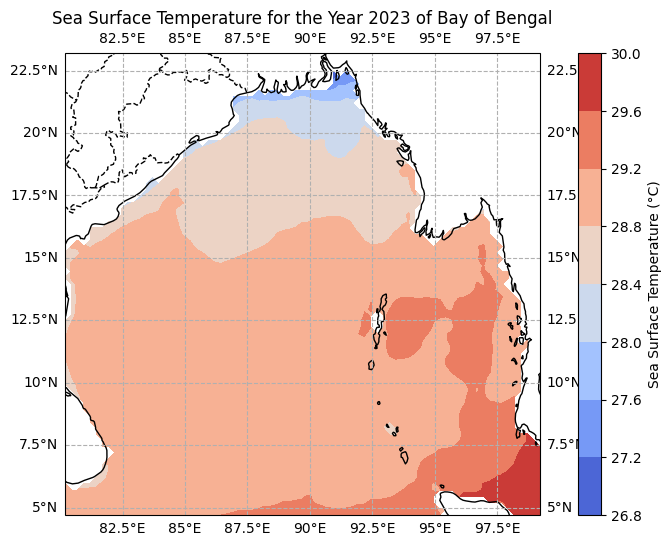

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Filter data for the year 2023
sst_data_2023 = data_30_years.sel(time=slice('2023-01-01', '2023-12-31'))

# Calculate the mean SST for the year 2023
sst_data_mean_2023 = sst_data_2023['sst'].mean(dim='time') - 273.15  # Convert from Kelvin to Celsius

# Create a Cartopy projection
projection = ccrs.PlateCarree()

# Plot the map of SST for the year 2023
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)
ax.coastlines()
sst_plot = plt.contourf(sst_data_mean_2023.longitude, sst_data_mean_2023.latitude, sst_data_mean_2023,
                        transform=projection, cmap='coolwarm')
plt.colorbar(sst_plot, label='Sea Surface Temperature (°C)')
plt.title('Sea Surface Temperature for the Year 2023 of Bay of Bengal')

# Add state boundaries
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linestyle='--')

# Add latitude and longitude scales
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show()


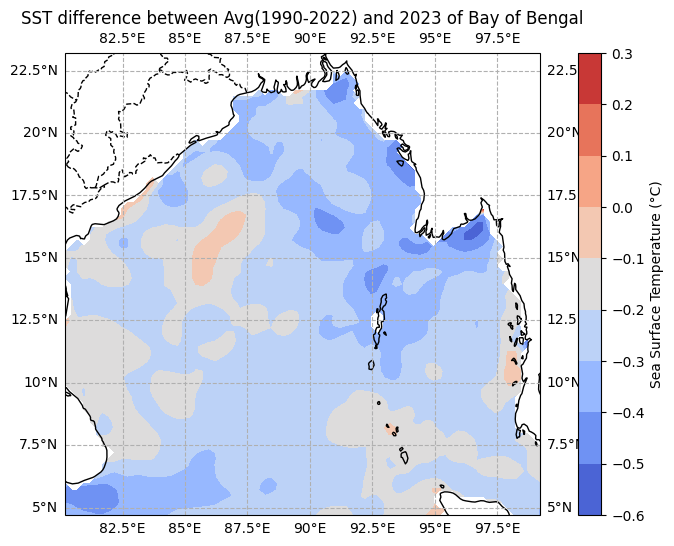

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

sst_data_1990_2022 = data_30_years.sel(time=slice('1990-01-01', '2022-12-31'))['sst'].mean(dim='time')

# Filter data for the year 2023
sst_2023 = data_30_years.sel(time=slice('2023-01-01', '2023-12-31'))['sst'].mean(dim='time')

# Calculate the mean SST for the year 2023
#sst_2023 = sst_data_2023['sst'].mean(dim='time') - 273.15  # Convert from Kelvin to Celsius

sst_difference = sst_data_1990_2022 - sst_2023

# Create a Cartopy projection
projection = ccrs.PlateCarree()

# Plot the map of SST for the year 2023
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)
ax.coastlines()
sst_plot = plt.contourf(sst_difference.longitude, sst_difference.latitude, sst_difference,
                        transform=projection, cmap='coolwarm')
plt.colorbar(sst_plot, label='Sea Surface Temperature (°C)')
plt.title('SST difference between Avg(1990-2022) and 2023 of Bay of Bengal')


# Add state boundaries
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linestyle='--')

sst_plot = plt.contourf(sst_difference.longitude, sst_difference.latitude, sst_difference,
                        transform=projection, cmap='coolwarm')


# Add latitude and longitude scales
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show()


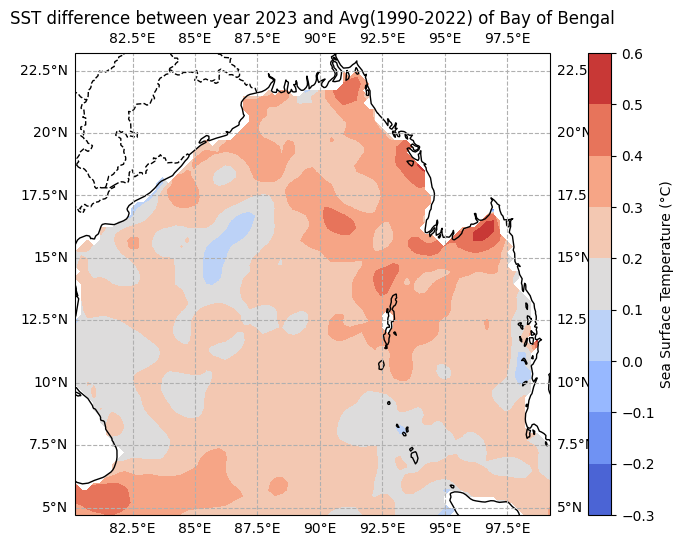

In [21]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

sst_data_1990_2022 = data_30_years.sel(time=slice('1990-01-01', '2022-12-31'))['sst'].mean(dim='time')

# Filter data for the year 2023
sst_2023 = data_30_years.sel(time=slice('2023-01-01', '2023-12-31'))['sst'].mean(dim='time')

# Calculate the mean SST for the year 2023
#sst_2023 = sst_data_2023['sst'].mean(dim='time') - 273.15  # Convert from Kelvin to Celsius

sst_difference =  sst_2023 - sst_data_1990_2022

# Create a Cartopy projection
projection = ccrs.PlateCarree()

# Plot the map of SST for the year 2023
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)
ax.coastlines()
sst_plot = plt.contourf(sst_difference.longitude, sst_difference.latitude, sst_difference,
                        transform=projection, cmap='coolwarm')
plt.colorbar(sst_plot, label='Sea Surface Temperature (°C)')
plt.title('SST difference between year 2023 and Avg(1990-2022) of Bay of Bengal')

# Add state boundaries
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linestyle='--')

sst_plot = plt.contourf(sst_difference.longitude, sst_difference.latitude, sst_difference,
                        transform=projection, cmap='coolwarm')


# Add latitude and longitude scales
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show()
